 Metabolic Data Analysis and Visualization with Python 

In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
df = pd.read_csv('metabolic_dataset.csv')
df.head()

,Metabolite,Condition,Replicate,Concentration,Units
0,Metabolite1,Control,1,80.281301,μM
1,Metabolite1,Control,2,84.658008,μM
2,Metabolite1,Control,3,75.872092,μM
3,Metabolite1,Control,4,75.872174,μM
4,Metabolite1,Control,5,84.938922,μM


pandas.read_csv() function is used to load the data into a DataFrame. df.head() is used to view the top 5 rows to understand the structure.

In [6]:
c1_mean = df['Replicate'].mean()

In [7]:
df.head()
df.sort_index()

,Metabolite,Condition,Replicate,Concentration,Units
0,Metabolite1,Control,1,80.281301,μM
1,Metabolite1,Control,2,84.658008,μM
2,Metabolite1,Control,3,75.872092,μM
3,Metabolite1,Control,4,75.872174,μM
4,Metabolite1,Control,5,84.938922,μM
...,...,...,...,...,...
95,Metabolite10,Treatment,1,94.497348,μM
96,Metabolite10,Treatment,2,81.219333,μM
97,Metabolite10,Treatment,3,83.688874,μM
98,Metabolite10,Treatment,4,82.007579,μM


df.head() displays the first 5 rows of your DataFrame.

In [9]:
df['Concentration'].max()

np.float64(150.0)

In [10]:
df.isnull().sum()

Metabolite       0
Condition        0
Replicate        0
Concentration    5
Units            0
dtype: int64

We use isnull().sum() to count how many missing (NaN) values are in the dataset.
We separately check the 'Concentration' column because we need to fix that in the next step.



In [16]:
df['Concentration'] = df.groupby(['Metabolite', 'Condition'])['Concentration'].transform(
    lambda x: x.fillna(x.median())
)

This code fills missing values in the Concentration column using the median of each Metabolite + Condition group, ensuring the biological grouping is preserved.

In [17]:
# Step 4: Convert all Concentration values to μM

df.loc[df['Units'] == 'mM', 'Concentration'] *= 1000

df.loc[df['Units'] == 'mM', 'Units'] = 'μM'


To standardize all units, we check where the Units are 'mM', multiply the concentration by 1000, and then update the Units column to 'μM'.

In [18]:
 # Detect and Replace Outliers using IQR method

def handle_outliers(group):
    Q1 = group['Concentration'].quantile(0.25)
    Q3 = group['Concentration'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    median = group['Concentration'].median()
    
    group['Concentration'] = group['Concentration'].apply(
        lambda x: median if (x < lower or x > upper) else x
    )
    return group

# Apply to each Metabolite + Condition group
df = df.groupby(['Metabolite', 'Condition'], group_keys=False).apply(handle_outliers)


C:\Users\hp 840 G1\AppData\Local\Temp\ipykernel_11528\2403939455.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(['Metabolite', 'Condition'], group_keys=False).apply(handle_outliers)


Outliers are values that lie outside the interquartile range (IQR). We calculate IQR for each Metabolite and Condition group, and replace outliers with the group median to maintain data consistency.

In [ ]:
#  Calculate mean, median, and standard deviation of Concentration
summary_stats = df.groupby(['Metabolite', 'Condition'])['Concentration'].agg(
    ['mean', 'median', 'std']
).reset_index()

summary_stats


,Metabolite,Condition,mean,median,std
0,Metabolite1,Control,80.324499,80.281301,4.464336
1,Metabolite1,Treatment,74.719990,74.719990,0.004087
2,Metabolite10,Control,62.371444,62.048568,0.659852
3,Metabolite10,Treatment,82.186189,82.007579,0.906722
4,Metabolite2,Control,47.547589,47.547589,0.796456
5,Metabolite2,Treatment,49.955735,50.356504,6.000106
6,Metabolite3,Control,20.091708,19.783831,0.691423
7,Metabolite3,Treatment,43.169796,42.719539,6.465101
8,Metabolite4,Control,51.799399,52.060923,0.658357
9,Metabolite4,Treatment,48.801217,48.900887,0.752712


In [20]:
# Step 7: Group by Metabolite and Condition to calculate mean Concentration
grouped_mean = df.groupby(['Metabolite', 'Condition'])['Concentration'].mean().reset_index()

# Display result
grouped_mean


,Metabolite,Condition,Concentration
0,Metabolite1,Control,80.324499
1,Metabolite1,Treatment,74.719990
2,Metabolite10,Control,62.371444
3,Metabolite10,Treatment,82.186189
4,Metabolite2,Control,47.547589
5,Metabolite2,Treatment,49.955735
6,Metabolite3,Control,20.091708
7,Metabolite3,Treatment,43.169796
8,Metabolite4,Control,51.799399
9,Metabolite4,Treatment,48.801217


We calculate the mean concentration for each Metabolite under each Condition — useful for plotting and comparing metabolic responses.

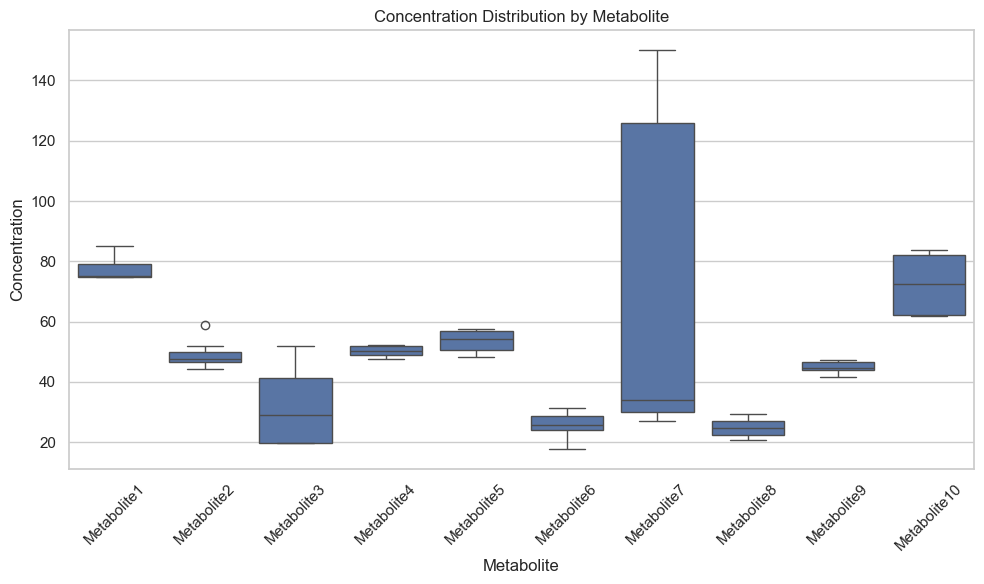

In [21]:
# Step 8a: Boxplot using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Metabolite', y='Concentration', data=df)
plt.title('Concentration Distribution by Metabolite')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Boxplots show the spread and outliers of concentration for each metabolite. Seaborn makes it easy to create grouped visuals.



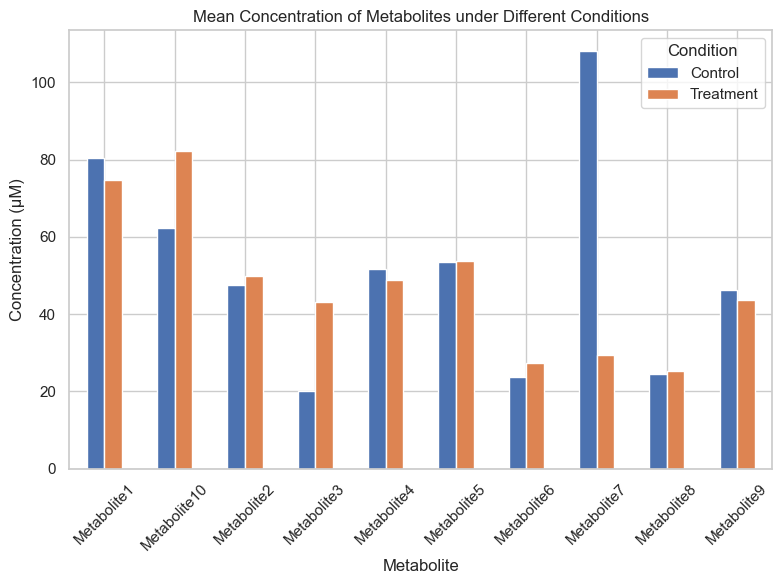

In [23]:
#  Bar plot using Matplotlib for each Metabolite under each Condition

pivot_data = grouped_mean.pivot(index='Metabolite', columns='Condition', values='Concentration')

# Plotting
pivot_data.plot(kind='bar', figsize=(8, 6))
plt.title('Mean Concentration of Metabolites under Different Conditions')
plt.ylabel('Concentration (μM)')
plt.xticks(rotation=45)
plt.legend(title='Condition')
plt.tight_layout()
plt.show()


This grouped bar chart compares mean concentrations under different conditions for each metabolite — helpful for visual comparison of treatment vs. control

In [26]:
!pip install plotly


In [31]:
!pip install nbformat --upgrade



   ----------- ---------------------------- 2/7 [attrs]
   ----------- ---------------------------- 2/7 [attrs]
   ----------------- ---------------------- 3/7 [referencing]
   ---------------------------- ----------- 5/7 [jsonschema]
   ---------------------------- ----------- 5/7 [jsonschema]
   ---------------------------- ----------- 5/7 [jsonschema]
   ---------------------------------- ----- 6/7 [nbformat]
   ---------------------------------- ----- 6/7 [nbformat]
   ---------------------------------- ----- 6/7 [nbformat]
   ---------------------------------------- 7/7 [nbformat]



In [36]:
!pip install nbformat --upgrade
!pip install ipython --upgrade
!pip install plotly --upgrade


In [37]:
import plotly.io as pio
pio.renderers.default = 'notebook'

In [38]:
pio.renderers.default = 'browser'


In [46]:
import plotly.graph_objects as go
import plotly.io as pio


# Create scatter plot
fig = go.Figure(data=[go.Scatter(
    x=[1, 2, 3, 4], y=[10, 11, 12, 13],
    mode='markers',
    marker=dict(
        color=['rgb(93, 164, 214)', 'rgb(255, 144, 14)',
               'rgb(44, 160, 101)', 'rgb(255, 65, 54)'],
        opacity=[1, 0.8, 0.6, 0.4],
        size=[40, 60, 80, 100],
    )
)])

fig.show()


In [1]:
pip install seaborn

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 4.6 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/8.1 MB 4.9 MB/s eta 0:00:02
   --------------- ------------------------ 3.1/8.1 MB 4.9 MB/s eta 0:00:02
   ---------------------- ----------------- 4.5/8.1 MB 5.1 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.1 MB 5.1 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.1 MB 5.1 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 4.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.2 MB 1.6 MB/s eta 0:00:02
   -------------- ------------------------- 0.8/2.2 MB 2.5 MB/s eta 0:00:01
   ---------------------------- ----------- 1.6/2.2 MB 2.2 MB/s eta 0:00:01
   -----------------------

In [43]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [44]:
import plotly.express as px
